In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [5]:
import matplotlib.pyplot as plt
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

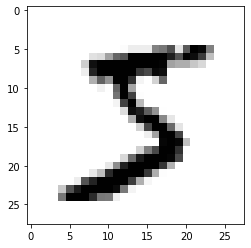

In [6]:
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

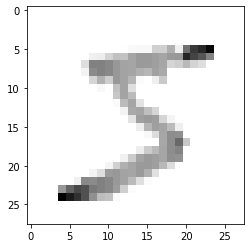

In [8]:
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  #Output layer.. It only has 10 neurons.. i.e. 0-9

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2641 - acc: 0.9222
Epoch 2/3
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1061 - acc: 0.9675
Epoch 3/3
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0709 - acc: 0.9779


In [17]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.0898 - acc: 0.9716
0.08978454905115069 0.9716


In [18]:
model.save('mnist_tf.model')

In [19]:
new_model = tf.keras.models.load_model('mnist_tf.model')

In [20]:
predictions = new_model.predict([x_test])

In [21]:
print(predictions)

[[9.7600896e-08 4.1848855e-07 1.7757275e-05 ... 9.9995482e-01
  3.0420699e-07 3.1060615e-06]
 [1.3642057e-09 2.6154186e-04 9.9973637e-01 ... 1.3180712e-09
  9.9462419e-08 1.1042987e-11]
 [8.6504954e-08 9.9955302e-01 5.1990857e-05 ... 6.1599407e-05
  2.9037884e-04 1.9265306e-06]
 ...
 [2.8082882e-08 1.6313541e-07 4.6051181e-07 ... 8.3150508e-06
  1.1501811e-05 1.2111281e-05]
 [3.2419842e-07 5.7439541e-07 4.1507683e-08 ... 8.3579459e-07
  1.0622285e-03 8.3264649e-09]
 [8.0352606e-07 1.6876039e-07 4.2983265e-06 ... 1.4260147e-08
  1.4006581e-06 7.2046252e-10]]


In [22]:
import numpy as np

In [23]:
print(np.argmax(predictions[0]))

7


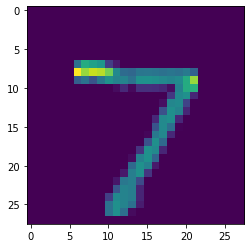

In [24]:
plt.imshow(x_test[0])
plt.show()

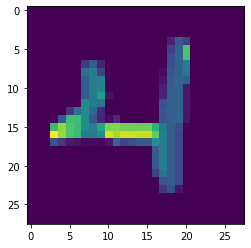

In [25]:
plt.imshow(x_test[103])
plt.show()

In [26]:
print(np.argmax(predictions[103]))

4
